<a href="https://colab.research.google.com/github/LingyiC/A-Cross-world-Happiness-Study-and-Website-Deploy/blob/master/Analyzation/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# delete _pycache_ folder first
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings            
warnings.filterwarnings("ignore") 

#from pandas.tools.plotting import parallel_coordinates

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [0]:
# load data from csv file_Lingyi
data_2016=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2016.csv')
data_2017=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2017.csv')
data_2018=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2018.csv')
data_2019=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2019.csv')

# data_2016=pd.read_csv('/content/gdrive/My Drive/Project code/data/2016.csv')
# data_2017=pd.read_csv('/content/gdrive/My Drive/Project code/data/2017.csv')
# data_2018=pd.read_csv('/content/gdrive/My Drive/Project code/data/2018.csv')
# data_2019=pd.read_csv('/content/gdrive/My Drive/Project code/data/2019.csv')

In [0]:
# unify the header
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]
data_2018.columns=[each.replace("."," ") for each in data_2018.columns]
data_2018.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2018.columns]

## Simple Linear Regression


In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import PredictionError


In [0]:
data_2018.head()

,Country,Region,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual
0,Afghanistan,Southern Asia,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
1,Albania,Central and Eastern Europe,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
2,Algeria,Middle East and Northern Africa,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
3,Angola,Sub-Saharan Africa,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
4,Argentina,Latin America and Caribbean,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005


Take extra effort to choose the right model to avoid Auto-esotericism/Rube-Goldberg’s Disease.

Here are the OLS assumptions:

1. Linearity: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
2. No multicollinearity: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
3. Zero conditional mean: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
4. Homoskedasticity: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
5. No autocorrelation (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

**At first, we analyze Happiness_Score~Economy**

Result: Happiness_Score = 2.2715 * Economy + 3.1141

**Analysis** is following: 

In [0]:
#If you want white background and grey grid,comment out plt.rcParams['axes.facecolor'] = 'white' & plt.grid(c='grey'), them restart run time and run all 

def Economy_regression(data):
  Happiness_Score = data.Happiness_Score
  factor_data = data.Economy
  score_economy_model = ols("Happiness_Score ~ Economy", data=data_2018).fit()
  model_summary = score_economy_model.summary()
  
  fig = plt.figure(figsize=(12,10))
  #plt.rcParams['axes.facecolor'] = 'white'
  
  fig = sm.graphics.plot_regress_exog(score_economy_model, "Economy", fig=fig)
  #plt.grid(c='grey')
  
  print(model_summary)
  
  # confidence interval
  x = data[['Economy']]
  y = data[['Happiness_Score']]
  # Retrieve our confidence interval values
  # _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
  # since wls_prediction_std(housing_model) returns 3 values
  _, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(score_economy_model)

  fig, ax = plt.subplots(figsize=(10,7))

  # plot the dots
  # 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
  ax.plot(x, y, 'o', label="Economy")

  # plot the trend line
  # g-- and r-- specify the color to use
  ax.plot(x, score_economy_model.fittedvalues, 'g--.', label="OLS")

  # plot upper and lower ci values
  ax.plot(x, confidence_interval_upper, 'r--')
  ax.plot(x, confidence_interval_lower, 'r--')

  # plot legend
  ax.legend(loc='best');
#   fig = plt.grid(c='grey')
  

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     296.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.01e-37
Time:                        19:15:25   Log-Likelihood:                -141.43
No. Observations:                 146   AIC:                             286.9
Df Residuals:                     144   BIC:                             292.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1141      0.143     21.817      0.0

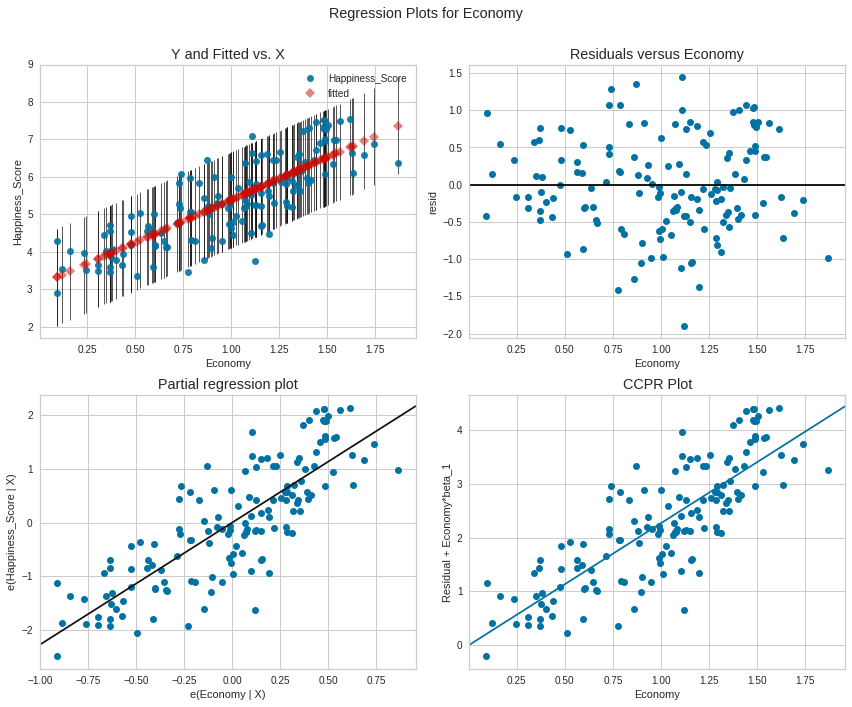

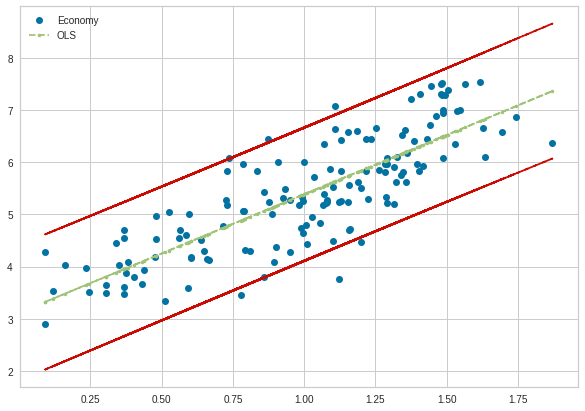

In [0]:
Economy_regression(data_2018)

The four graphs above:
1. The "Y and Fitted vs. X" graph plots the dependent variable against our predicted values with a confidence interval. The relationship in our graph indicates that `Happiness_Score` and `Economy` are positively correlated, i.e., when one variable increases the other decreases.

2. The “Residuals versus Economy” graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds. 

3. The “Partial regression plot” shows the relationship between `Happiness_Score` and `Economy`, taking in to account the impact of adding other independent variables on our existing total_unemployed coefficient. We'll see later how this same graph changes when we add more variables.

4. The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing `Economy` coefficient.  [PARTIAL RESIDUAL PLOT](https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/partresi.htm)

5. The next plot graphs our trend line (green), the observations (dots), and our confidence interval (red).

## Multiple Linear Regression

In [0]:
def Economy_multiple_regression(data):
  X = data[['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
  y = data["Happiness_Score"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
  Happiness_Score = data.Happiness_Score
  Economy = data.Economy
  Family = data.Family
  Health = data.Health
  Freedom = data.Freedom
  Generosity = data.Generosity
  Trust = data.Trust
  Dystopia_Residual = data.Dystopia_Residual
  happiness_score_model = ols("""Happiness_Score ~ Economy
                                              + Family
                                              + Health
                                              + Freedom
                                              + Generosity
                                              + Trust
                                              + Dystopia_Residual""", data=data_2018).fit()
  # summarize our model
  happiness_score_model_summary = happiness_score_model.summary()
  print(happiness_score_model_summary)
  
  fig = plt.figure(figsize=(10,12))
  
  fig = sm.graphics.plot_partregress_grid(happiness_score_model, fig=fig)
#   plt.grid(c='grey')
  fig = plt.figure(figsize=(10,12))
  fig = sm.graphics.plot_regress_exog(happiness_score_model, "Economy", fig=fig)
  

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.205e+08
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:15:29   Log-Likelihood:                 989.06
No. Observations:                 146   AIC:                            -1962.
Df Residuals:                     138   BIC:                            -1938.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002      0.00

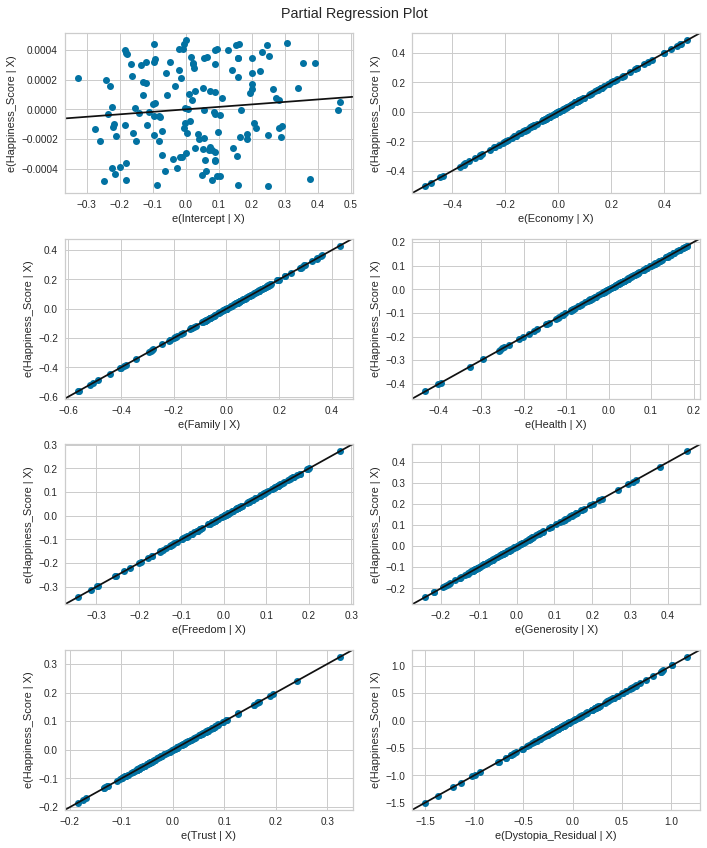

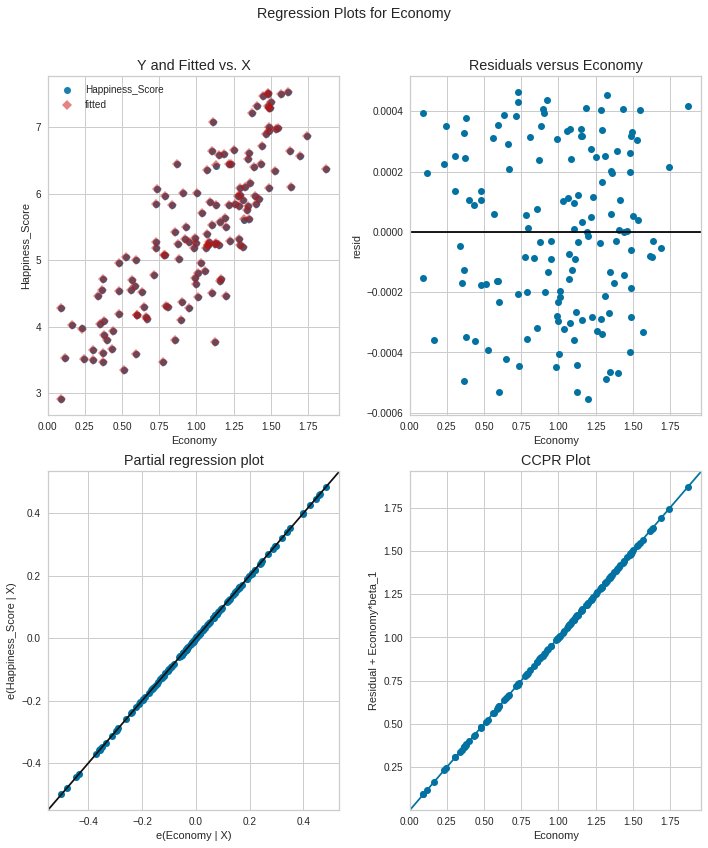

In [0]:
Economy_multiple_regression(data_2018)

## Use sklearn 


In [0]:

# from sklearn.datasets import load_iris
from sklearn import tree
def Linear_Regression(data):
  X = data[['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
  y = data["Happiness_Score"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
  model = LinearRegression()
  model.fit(X_train, y_train)
  fig = plt.figure(figsize=(8,8),facecolor='w')
  visualizer = PredictionError(model)
  visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
  visualizer.score(X_test, y_test)  # Evaluate the model on the test data
  g = visualizer.poof()             # Draw/show/poof the data
 
  print("********Making predictions for the following 5 happiness scores********")
  print(X_test.head())
  print("The predicted values are")
  model.predict(X_test)
  print(model.predict(X_test.head()))
  print(' ')

  print("************************Compute accuracy scores************************")
  print("Returns the coefficient of determination R^2 of the prediction: {}".format(model.score(X_test, y_test)))


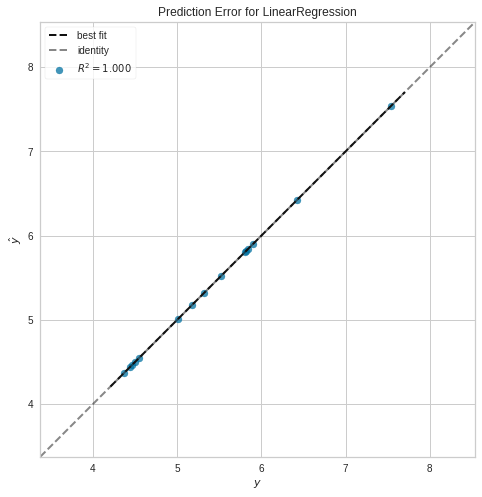

********Making predictions for the following 5 happiness scores********
      Economy    Family    Health   Freedom  Generosity     Trust  \
98   1.616463  1.533524  0.796667  0.635423    0.362012  0.315964   
66   1.284556  1.384369  0.606042  0.437454    0.201964  0.119283   
53   1.286012  1.343133  0.687763  0.175864    0.078402  0.036637   
75   1.314582  1.473516  0.628950  0.234232    0.010165  0.011866   
121  1.009850  1.259976  0.625131  0.561213    0.490864  0.073654   

     Dystopia_Residual  
98            2.277027  
66            1.784893  
53            1.716459  
75            2.228441  
121           0.419389  
The predicted values are
[7.53708126 5.81861397 5.32433148 5.90178342 4.44021805]
 
************************Compute accuracy scores************************
Returns the coefficient of determination R^2 of the prediction: 0.9999998094025924


In [0]:
Linear_Regression(data_2018)

## Random Tree Regressor


### Target Variable Analysis 
Is it norm?

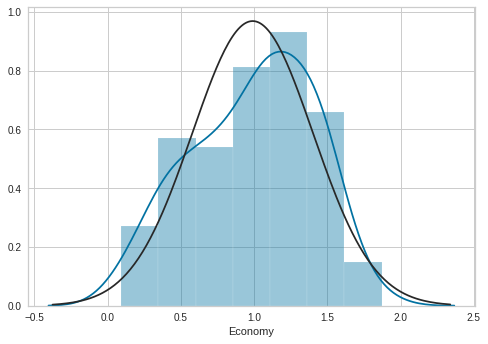

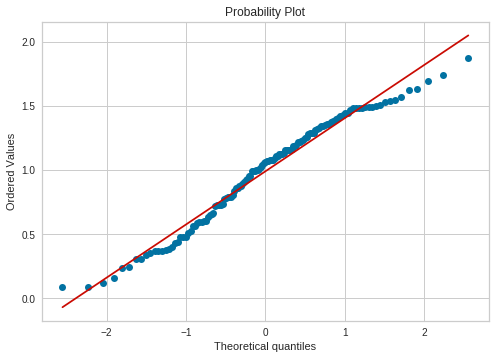

In [0]:
X = data_2018[['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
y = data_2018["Happiness_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats 
sns.distplot(X_train['Economy'],fit=norm);
fig = plt.figure()
res = stats.probplot(X_train['Economy'], plot=plt)

It looks norm!

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pandas as pd 
def Random_Tree_Regressor(data):
  X = data[['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
  y = data["Happiness_Score"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
  # Define model
  model = DTR()
  #Fit the model
  model = model.fit(X_train,y_train)
    # try fitting a decision tree regression model...
  DTR_1 = DTR(max_depth=None) # declare the regression model form. Let the depth be default.
  # DTR_1.fit(X,Y) # fit the training data
  scores_dtr = cross_val_score(DTR_1, X_train, y_train, cv=10,scoring='explained_variance') # 10-fold cross validation
  
  visualizer = PredictionError(model)
  
  fig = plt.figure(figsize=(8,8))
#   fig = plt.grid(c='grey')
  visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
  visualizer.score(X_test, y_test)  # Evaluate the model on the test data
  g = visualizer.poof()             # Draw/show/poof the data
 
  print('********************scores for k=10 fold validation********************')
  print(' ')
  print(scores_dtr)
  print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))
  print(' ')

  print("********Making predictions for the following 5 happiness scores********")
  print(X_test.head())
  print("The predicted values are")
  y_predict = model.predict(X_test)
  print(model.predict(X_test.head()))
  print(' ')
  
  print("************************Compute accuracy scores************************")
  print("Returns the coefficient of determination R^2 of the prediction: {}".format(model.score(X_test, y_test)))
  
#   fig = plt.figure(figsize=(10,12))
#   fig = sm.graphics.plot_regress_exog(model, "Economy", fig=fig)


  # class labels
  labels = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']

  graph = Source(tree.export_graphviz(model, out_file=None
     , feature_names=labels, class_names=['0', '1', '2'] 
     , filled = True))
  
  display(SVG(graph.pipe(format='svg')))
  #display(Image(graph.create_png()))

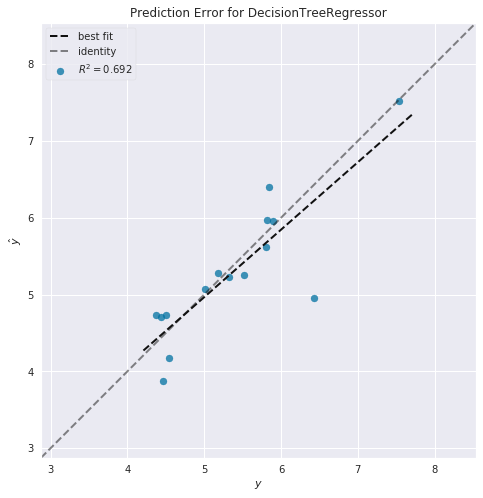

********************scores for k=10 fold validation********************
 
[0.83679817 0.85758729 0.7945425  0.78586175 0.83979498 0.89079324
 0.39113484 0.85232453 0.8888998  0.83240995]
Est. explained variance: 0.80 (+/- 0.28)
 
********Making predictions for the following 5 happiness scores********
      Economy    Family    Health   Freedom  Generosity     Trust  \
98   1.616463  1.533524  0.796667  0.635423    0.362012  0.315964   
66   1.284556  1.384369  0.606042  0.437454    0.201964  0.119283   
53   1.286012  1.343133  0.687763  0.175864    0.078402  0.036637   
75   1.314582  1.473516  0.628950  0.234232    0.010165  0.011866   
121  1.009850  1.259976  0.625131  0.561213    0.490864  0.073654   

     Dystopia_Residual  
98            2.277027  
66            1.784893  
53            1.716459  
75            2.228441  
121           0.419389  
The predicted values are
[7.52199984 5.97300005 5.22700024 5.96299982 4.71400023]
 
************************Compute accuracy scores**

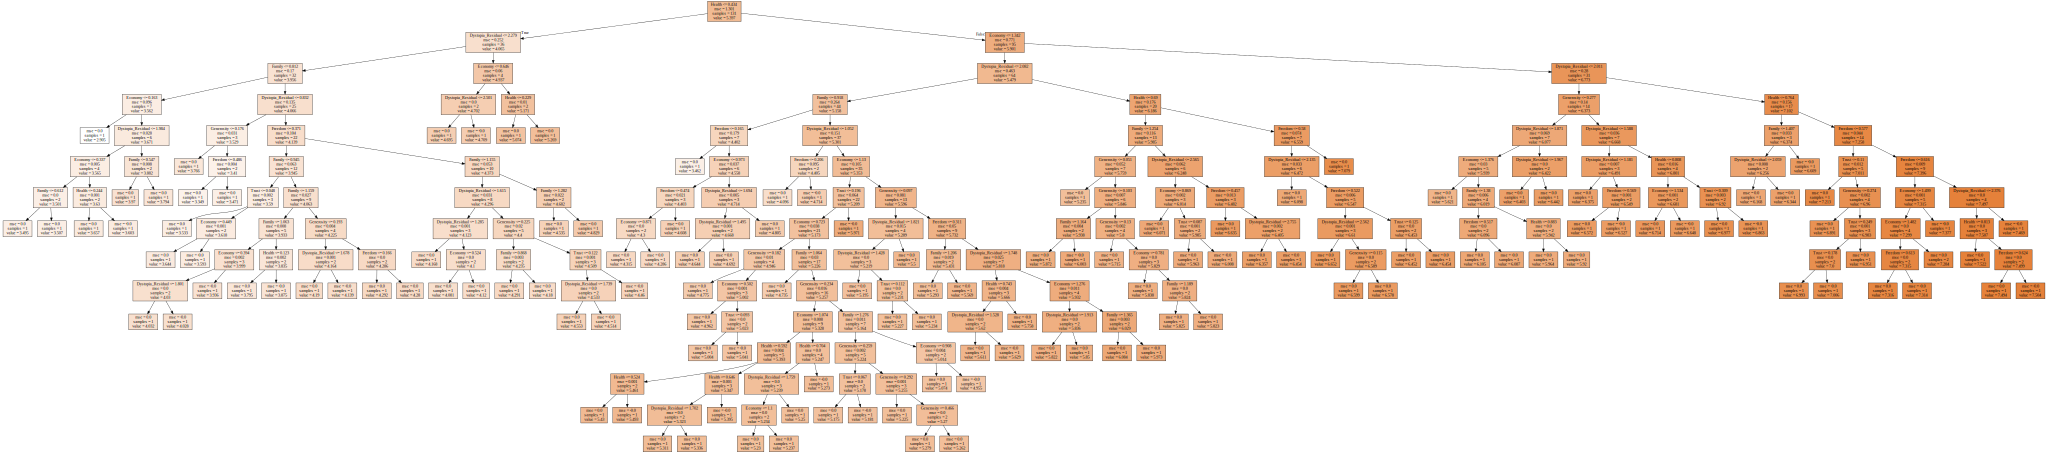

In [0]:
Random_Tree_Regressor(data_2018)

## Random forest

In [0]:
def Random_Forest_Regressor(data):
  X = data[['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
  y = data["Happiness_Score"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)  
  estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
  mean_rfrs = []
  std_rfrs_upper = []
  std_rfrs_lower = []
  yt = [i for i in y_train] # quick pre-processing of the target
  np.random.seed(1)
  for i in estimators:
      model = RFR(n_estimators=i,max_depth=None)
      scores_rfr = cross_val_score(model,X_train,yt,cv=10,scoring='explained_variance')
      print('estimators:',i)
  #     print('explained variance scores for k=10 fold validation:',scores_rfr)
      print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
      mean_rfrs.append(scores_rfr.mean())
      std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
      std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting
    # and plot...
      model.fit(X_train,y_train)
      print("Accuracy scores R^2: {}".format(model.score(X_test, y_test)))
      print("")
      visualizer = PredictionError(model)
      fig = plt.figure(figsize=(8,8))
      visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
      visualizer.score(X_test, y_test)  # Evaluate the model on the test data
      g = visualizer.poof()             # Draw/show/poof the data
    
    
    
  fig = plt.figure(figsize=(12,8))
  #plt.grid(c="grey")
  plt.plot(estimators,mean_rfrs,marker='o',
         linewidth=4,markersize=12)
  plt.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                  facecolor='green',alpha=0.3,interpolate=True)
  plt.title('Expected Variance of Random Forest Regressor')
  plt.ylabel('Expected Variance')
  plt.xlabel('Trees in Forest')
  plt.show()

estimators: 2
Est. explained variance: 0.83 (+/- 0.16)
Accuracy scores R^2: 0.7621756413413048



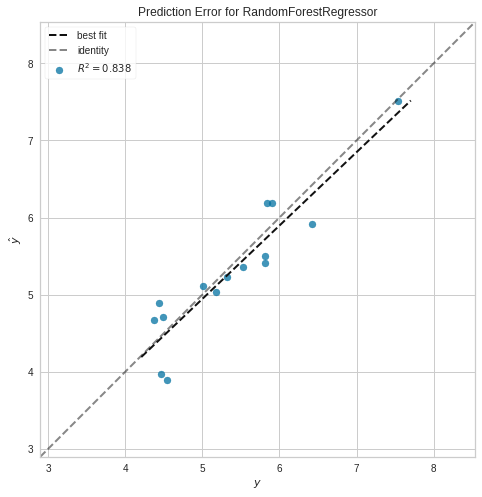

estimators: 5
Est. explained variance: 0.87 (+/- 0.15)
Accuracy scores R^2: 0.8565335472454708



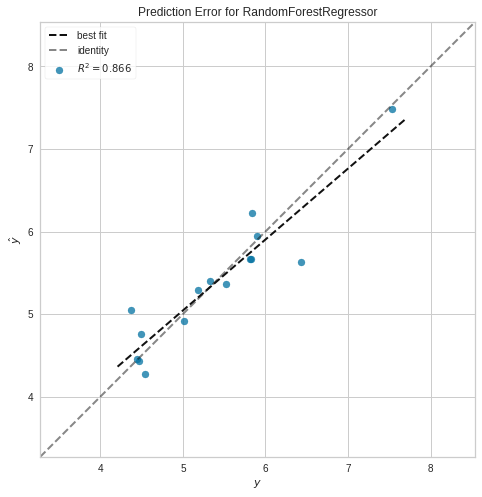

estimators: 10
Est. explained variance: 0.89 (+/- 0.08)
Accuracy scores R^2: 0.8688166809721306



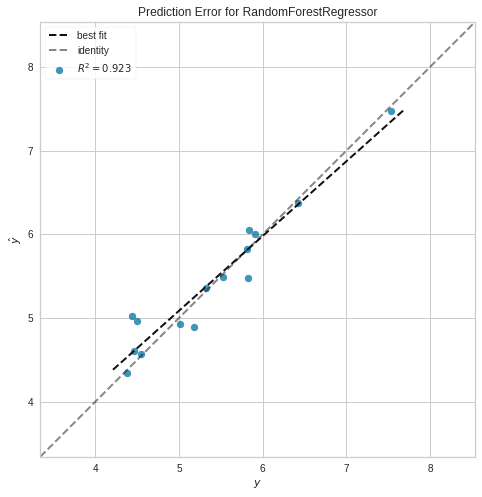

estimators: 15
Est. explained variance: 0.88 (+/- 0.11)
Accuracy scores R^2: 0.9213668217108382



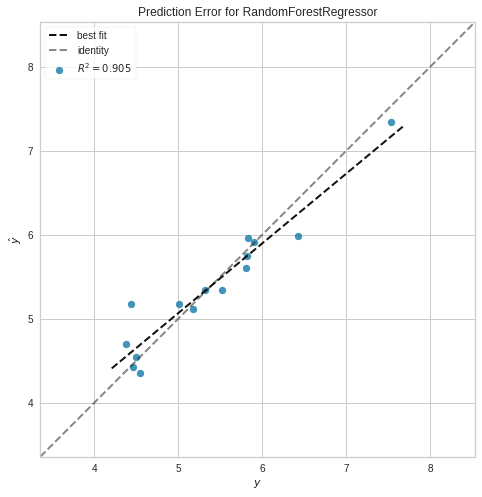

estimators: 20
Est. explained variance: 0.90 (+/- 0.09)
Accuracy scores R^2: 0.8990465843339684



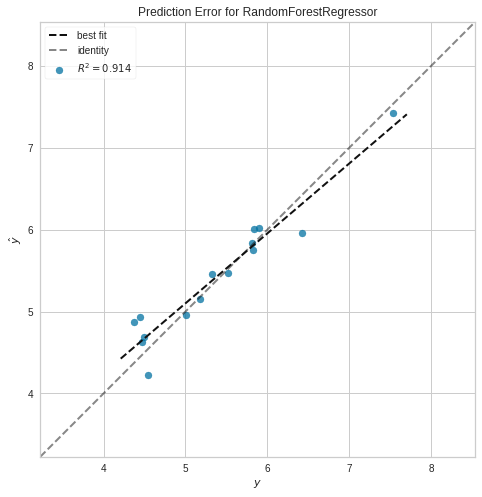

estimators: 25
Est. explained variance: 0.90 (+/- 0.11)
Accuracy scores R^2: 0.9247114595614242



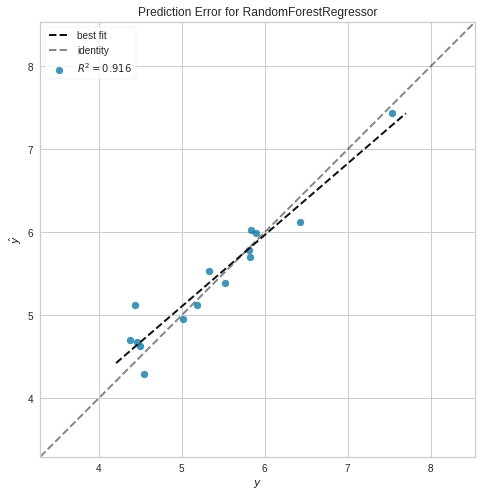

estimators: 30
Est. explained variance: 0.91 (+/- 0.09)
Accuracy scores R^2: 0.9138830605133693



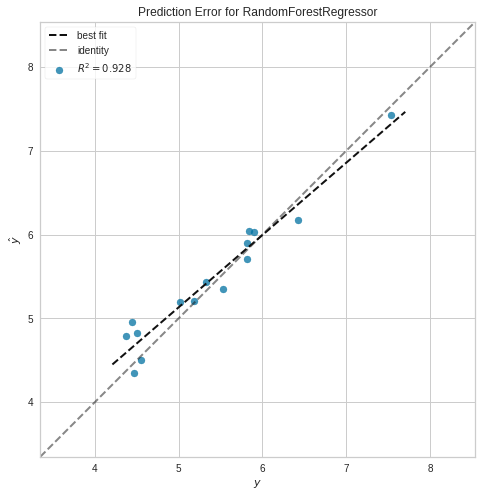

estimators: 35
Est. explained variance: 0.89 (+/- 0.10)
Accuracy scores R^2: 0.9262040969993642



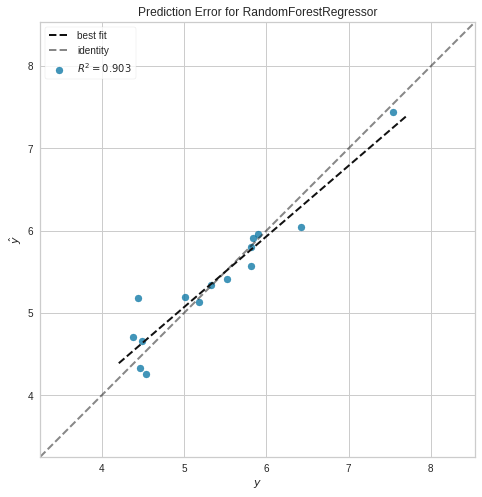

estimators: 40
Est. explained variance: 0.91 (+/- 0.08)
Accuracy scores R^2: 0.9098853732028858



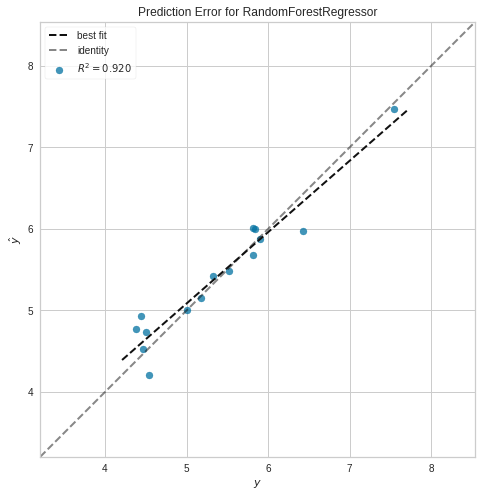

estimators: 45
Est. explained variance: 0.91 (+/- 0.10)
Accuracy scores R^2: 0.9120841504002047



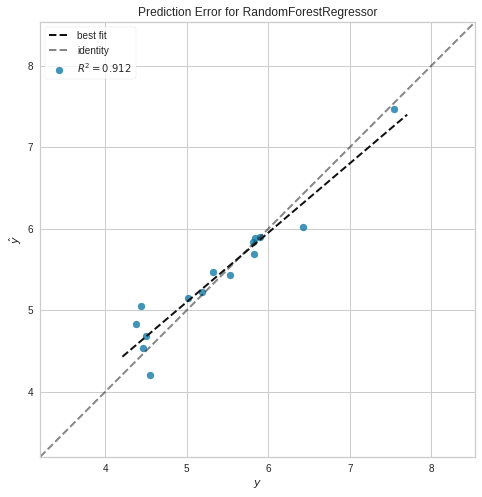

estimators: 50
Est. explained variance: 0.91 (+/- 0.09)
Accuracy scores R^2: 0.9137026206352983



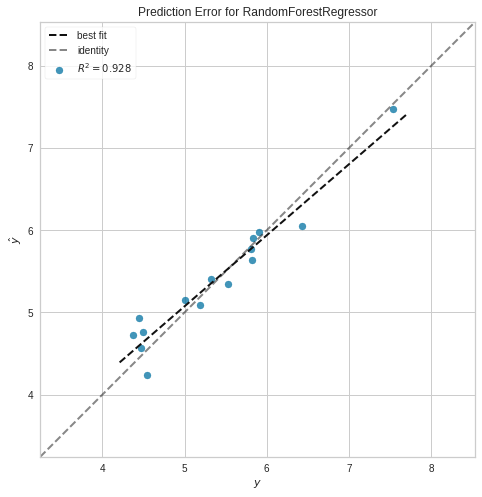

estimators: 55
Est. explained variance: 0.91 (+/- 0.09)
Accuracy scores R^2: 0.9218347405887652



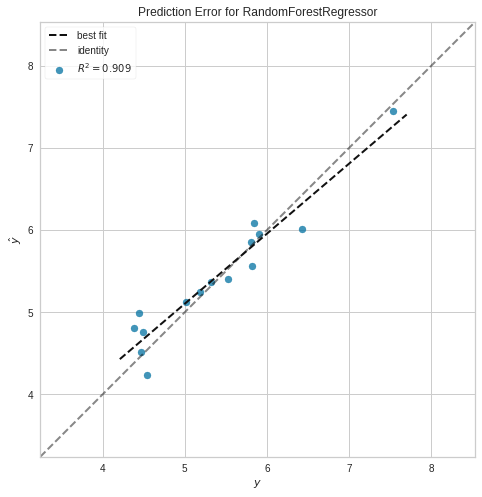

estimators: 60
Est. explained variance: 0.91 (+/- 0.10)
Accuracy scores R^2: 0.8961306991901274



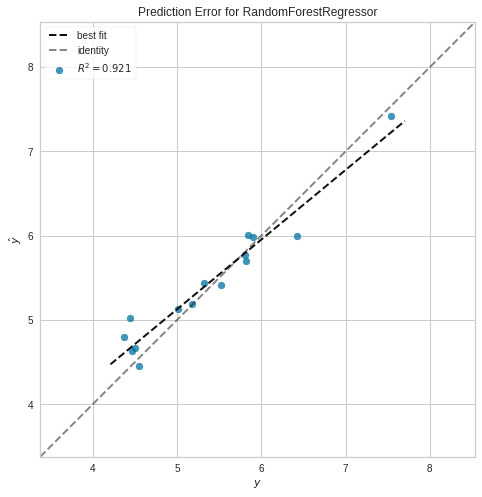

estimators: 65
Est. explained variance: 0.90 (+/- 0.10)
Accuracy scores R^2: 0.9167780872068719



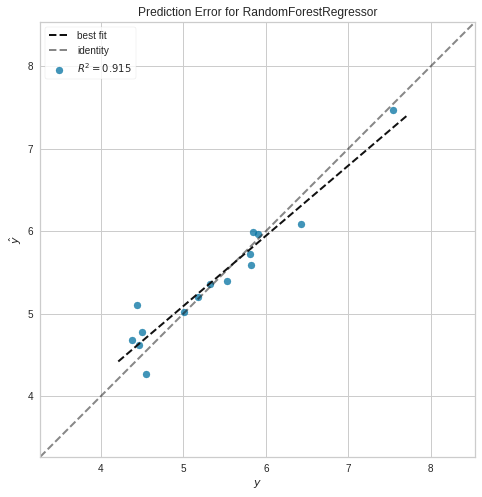

estimators: 70
Est. explained variance: 0.90 (+/- 0.11)
Accuracy scores R^2: 0.9283810261570795



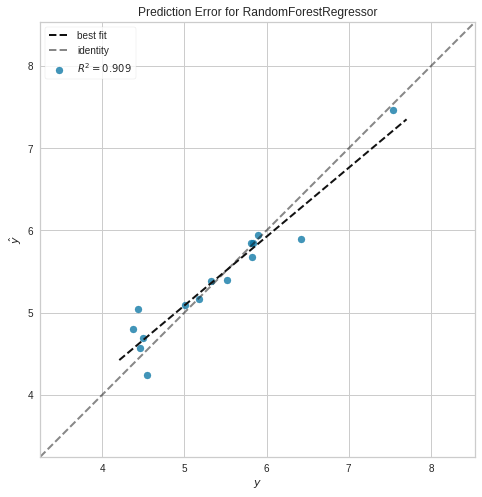

estimators: 75
Est. explained variance: 0.90 (+/- 0.10)
Accuracy scores R^2: 0.9301395762623675



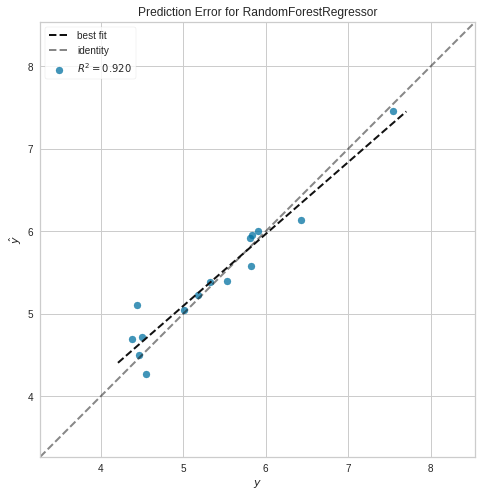

estimators: 80
Est. explained variance: 0.91 (+/- 0.10)
Accuracy scores R^2: 0.920464879753236



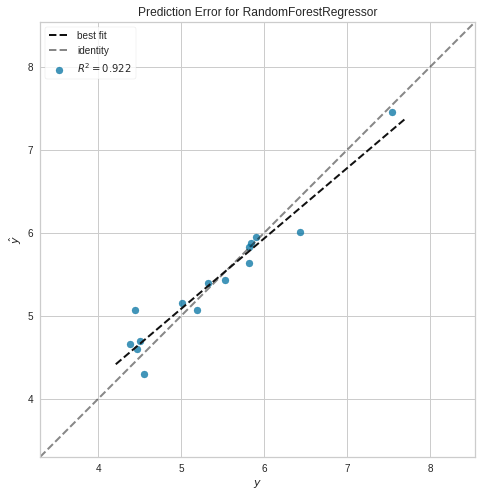

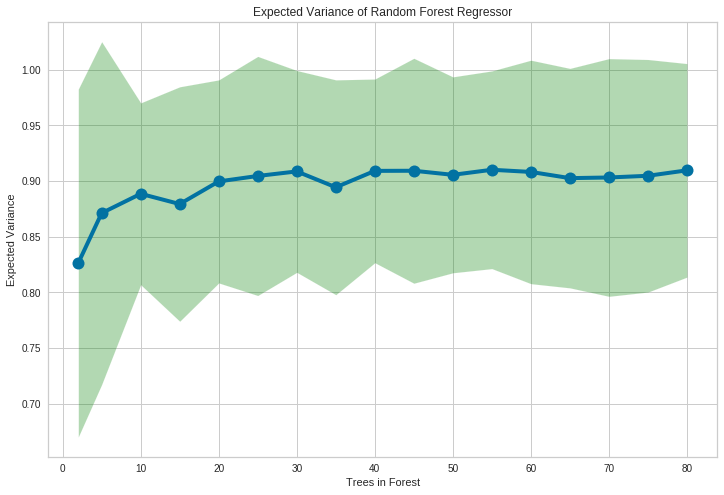

In [0]:
Random_Forest_Regressor(data_2018)

## Support Vector Regression


In [0]:
def support_vector_regression(data):
  X = data[['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
  y = data["Happiness_Score"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
  # Define model
#   y_true = y_train.as_matrix() 
#   lab_enc = preprocessing.LabelEncoder()
#   training_scores_encoded = lab_enc.fit_transform(y_train)
#   print(training_scores_encoded)
#   print(utils.multiclass.type_of_target(y_train))
#   #print(utils.multiclass.type_of_target(y_true.astype('int')))
#   print(utils.multiclass.type_of_target(training_scores_encoded))
  fig = plt.figure(figsize=(8,8),facecolor='w')
  model = SVR()
  model.fit(X_train,y_train)
  visualizer = PredictionError(model)
  visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
  visualizer.score(X_test, y_test)  # Evaluate the model on the test data
  g = visualizer.poof()             # Draw/show/poof the data

  print("********Making predictions for the following 5 happiness scores********")
  print(X_test.head())
  print("The predicted values are")
  model.predict(X_test)
  print(model.predict(X_test.head()))
  print(' ')

  print("************************Compute accuracy scores************************")
  print("Returns the coefficient of determination R^2 of the prediction: {}".format(model.score(X_test, y_test)))


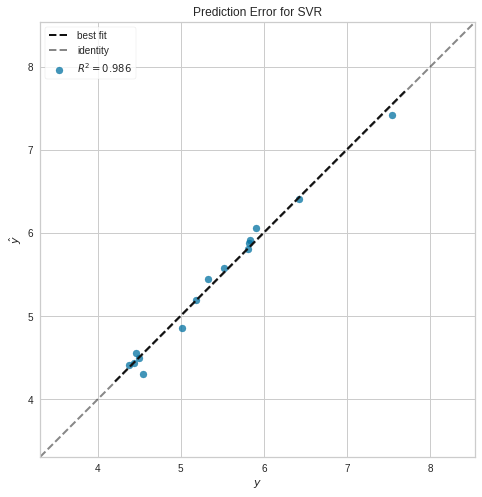

********Making predictions for the following 5 happiness scores********
      Economy    Family    Health   Freedom  Generosity     Trust  \
98   1.616463  1.533524  0.796667  0.635423    0.362012  0.315964   
66   1.284556  1.384369  0.606042  0.437454    0.201964  0.119283   
53   1.286012  1.343133  0.687763  0.175864    0.078402  0.036637   
75   1.314582  1.473516  0.628950  0.234232    0.010165  0.011866   
121  1.009850  1.259976  0.625131  0.561213    0.490864  0.073654   

     Dystopia_Residual  
98            2.277027  
66            1.784893  
53            1.716459  
75            2.228441  
121           0.419389  
The predicted values are
[7.42386909 5.88503254 5.44201754 6.06650015 4.44430712]
 
************************Compute accuracy scores************************
Returns the coefficient of determination R^2 of the prediction: 0.9859079817441011


In [0]:
support_vector_regression(data_2018)

## Neural Network

In [0]:
def Neural_Network(data):
  X = data[['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
  y = data["Happiness_Score"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
  model = MLPRegressor()
  model.fit(X_train, y_train)
  fig = plt.figure(figsize=(8,8),facecolor='w')
  visualizer = PredictionError(model)
  visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
  visualizer.score(X_test, y_test)  # Evaluate the model on the test data
  g = visualizer.poof()             # Draw/show/poof the data
  
  
  print("********Making predictions for the following 5 happiness scores********")
  print(X_test.head())
  print("The predicted values are")
  model._predict(X_test)
  print(model._predict(X_test.head()))
  print(' ')

  print("************************Compute accuracy scores************************")
  print("Returns the coefficient of determination R^2 of the prediction: {}".format(model.score(X_test, y_test)))


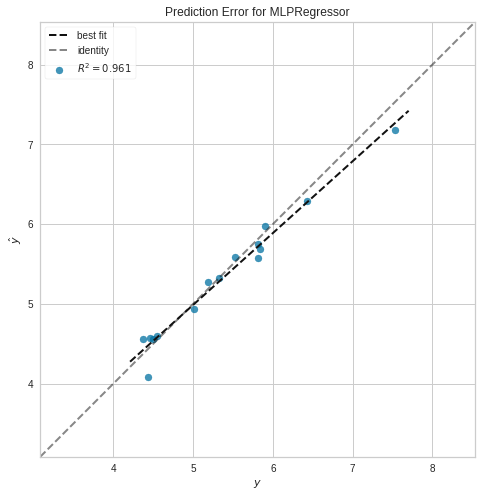

********Making predictions for the following 5 happiness scores********
      Economy    Family    Health   Freedom  Generosity     Trust  \
98   1.616463  1.533524  0.796667  0.635423    0.362012  0.315964   
66   1.284556  1.384369  0.606042  0.437454    0.201964  0.119283   
53   1.286012  1.343133  0.687763  0.175864    0.078402  0.036637   
75   1.314582  1.473516  0.628950  0.234232    0.010165  0.011866   
121  1.009850  1.259976  0.625131  0.561213    0.490864  0.073654   

     Dystopia_Residual  
98            2.277027  
66            1.784893  
53            1.716459  
75            2.228441  
121           0.419389  
The predicted values are
[[7.17935092]
 [5.74862012]
 [5.31951049]
 [5.97664265]
 [4.08205067]]
 
************************Compute accuracy scores************************
Returns the coefficient of determination R^2 of the prediction: 0.9605797537753912


In [0]:
Neural_Network(data_2018)